# 548 hw2 solution

# Setup

In [ ]:
# "magic" commands, prefaced with "%", changes settings in the notebook

# this ensures plots are embedded in notebook web page
%matplotlib inline

# pdb = Python debugger, so this command turns the debugger OFF
# %pdb off

# numpy = numerical Python, implements arrays (/ matrices)
import numpy as np
# limit number of decimal places printed for floating-point numbers
np.set_printoptions(precision=3)

# scipy = scientific Python, implements operations on arrays / matrices
import scipy as sp
# linalg = linear algebra, implements eigenvalues, matrix inverse, etc
from scipy import linalg as la
# optimize = optimization, root finding, etc
from scipy import optimize as op

# produce matlab-style plots
import matplotlib as mpl
# increase font size on plots
mpl.rc('font',**{'size':18})
# use LaTeX to render symbols
mpl.rc('text',usetex=False)
# animation
from matplotlib import animation as animation
from IPython.display import HTML
mpl.rc('animation', html='jshtml')
# Matlab-style plotting
import matplotlib.pyplot as plt

# symbolic computation, i.e. computer algebra (like Mathematica, Wolfram Alpha)
import sympy as sym

import pdb

# os = operating system; access OS-level commands
# e.g. create directory, delete file, execute command
# (more platform-independent than "!")
import os

# test whether this is a Colaboratory or Jupyter notebook
try:
  import google.colab
  COLAB = True
  print('Colaboratory Notebook')
except:
  COLAB = False
  print('Jupyter Notebook')

# Colab notebook
if COLAB:
  # pip = Python package manager; "!" means "run at system level"
  !pip install slycot
  !pip install control
  
  # render SymPy equations nicely in Colaboratory Notebook
  def colab_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
    javascript(url=url)
    return sym.printing.latex(exp,**options)
  
  sym.init_printing(use_latex="mathjax",latex_printer=colab_latex_printer)

# Jupyter notebook
else:
  init_printing(use_latex='mathjax')

# Python's Control Systems Toolbox
import control as ctrl

# SciPy module that implements many of the routines in ctrl
from scipy import signal as sig

Colaboratory Notebook


# sensitivity and stability margins

***Purpose:*** *assess robustness properties of a pole-placement controller for a SISO system.*

Consider a PI controller applied to a stable first-order process ($a > 0$) in the following block diagram:

$$ P(s) = \frac{b}{s + a},\ C(s) = k_P + \frac{k_I}{s}. $$

![control system with two degrees-of-freedom](https://raw.githubusercontent.com/sburden/548-20sp/master/feedback-2dof.png)

Assume $F = 1$ in what follows.


(a) *Analytically determine proportional $k_P$ and integral $k_I$ gains that place both poles of the closed-loop transfer function $T_{yr} = \frac{PC}{1+PC}$ at $-p$.*

**Solution:**

Given $ P(s) = \frac{b}{s + a}$ and  $C(s) = k_P + \frac{k_I}{s} = \frac{k_Ps + k_I}{s},$ then
$$PC = \frac{b \left(k_{I} + k_{P} s\right)}{s \left(a + s\right)}$$
and

$$T_{yr} = \frac{PC}{1+PC} = \frac{b \left(k_{I} + k_{p} s\right)}{b \left(k_{I} + k_{p} s\right) + s \left(a + s\right)}$$

$$\qquad \qquad \quad = \frac{b \left(k_{I} + k_{P} s\right)}{b k_{I} + s \left(a + b k_{P} + s\right)}.$$

Placing both poles at $-p$ means we want the denominator of $T_{yr} = (s + p)^2$ such that:

$$b k_{I} + s \left(a + b k_{P} + s\right) = s^{2} + 2 p s + p^{2}$$

The values of $k_{I}$ and $k_{P}$ that satisfy this is:
$$k_{I} =   \frac{p^{2}}{b} \quad \text{and} \quad k_{P} = \frac{1}{b} \left(2 p - a \right)$$

such that:
$$T_{yr} = \frac{PC}{1+PC} = \frac{- a s + 2 p s + p^{2}} {s^{2} + 2 p s + p^{2}}$$

(b) *Analytically determine the sensitivity transfer function $S = \frac{1}{1 + PC}$.*

**Solution:**

Given $PC = \frac{b \left(k_{I} + k_{P} s\right)}{s \left(a + s\right)}$, $k_{I} =   \frac{p^{2}}{b}$ and $k_{P} = \frac{1}{b} \left(2 p - a \right)$

then,
$$S = \frac{1}{1 + PC} = \frac{s \left(a + s\right)}{s^{2} + 2 p s + p^{2}}$$

Assume $a,b = 1$ in what follows.

(c) *Bode plot $S$ for different values of $p$ and describe the qualitative difference you observe when $p < a$ versus $p > a$.*

**Solution:**


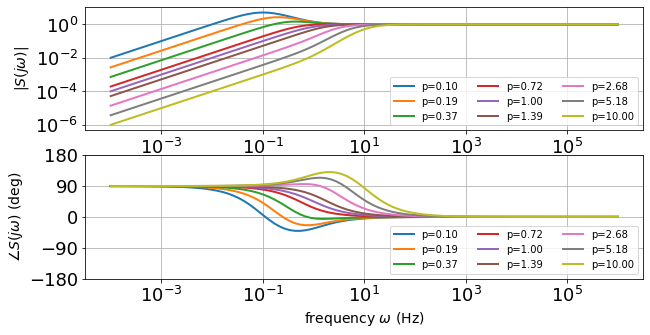

In [ ]:
# System setup - using the symbolic package
a,b,p = sym.symbols('a b p', real=True)
s = sym.symbols('s')
S = s*(a + s)/(s**2 + 2*p*s + p**2)

a_val, b_val = 1, 1
pvals = list(np.logspace(-1,1,8))
pvals.append(a_val)
pvals.sort()
omega=np.logspace(-4,6,100)
S_val = sym.lambdify((s,p),S.subs({a:a_val}))
plt.figure(figsize=(10,5))
axs_mag = []; axs_ang = []
ax_mag = plt.subplot(2,1,1); ax_mag.grid(True)
ax_ang = plt.subplot(2,1,2); ax_ang.grid(True)
for _p in pvals:
    mag = np.abs(S_val(1.j*omega, _p))
    ang = np.unwrap(np.angle(S_val(1.j*omega, _p)))*180./np.pi
    ax_mag.loglog(omega,mag,label='p=%.2f'%_p, lw=2)
    ax_ang.semilogx(omega,ang,label='p=%.2f'%_p, lw=2)
    axs_mag.append(ax_mag)
    axs_ang.append(ax_ang)
    pass

ax_mag.set_ylabel(r'$|S(j\omega)|$',fontsize=14)
ax_mag.set_yticks([10**-6,10**-4,10**-2,10**0])
ax_mag.legend(ncol=3, fontsize=10)

ax_ang.set_xlabel(r'frequency $\omega$ (Hz)',fontsize=14)
ax_ang.set_ylabel(r'$\angle S(j\omega)$ (deg)',fontsize=14)
ax_ang.set_yticks([180,90,0,-90,-180])
ax_ang.legend(ncol=3, fontsize=10)

When $p < a$, the magnitude has a peak > 1 (0 dB) over some frequency ranges. This means that if there is noise or disturbance over this frequency range, then it can get amplified. 

When $p > a$, the system starts behaving like a proper high pass filter but the range of frequency it passes gets smaller as p increases.

(d) *Plot gain margin $g_m$, phase margin $\varphi_m$, and stability margin $s_m$ as a function of $p$.*

**Solution:**

Let $L = PC$ be the open loop transfer function. Given $PC = \frac{b \left(k_{I} + k_{P} s\right)}{s \left(a + s\right)}$, $k_{I} =   \frac{p^{2}}{b}$ and $k_{P} = \frac{1}{b} \left(2 p - a \right)$

then,
$$L = PC = \frac{p^{2} + 2 p s - a s}{s \left(a + s\right)}$$

Using a reduced range of p, that is, $p \in [0, 2]$



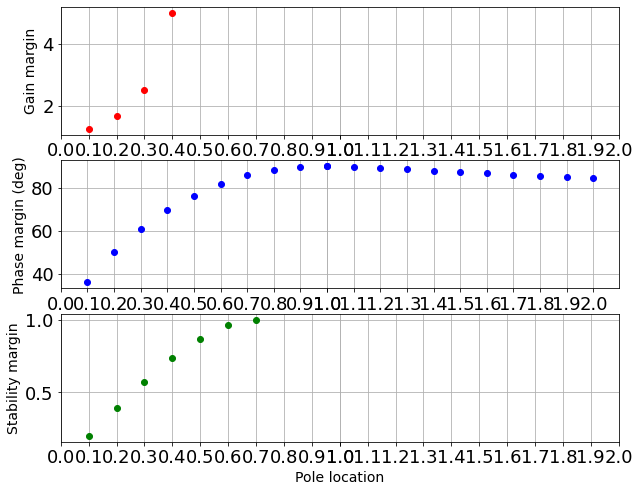

In [ ]:
# Using the control systems toolbox to compute gm, pm and sm
a,b,p = sym.symbols('a b p', real=True)
s = ctrl.tf('s')
# L  = (p**2 + 2*p*s - a*s) / (s*(a + s))

L = lambda p,a : (p**2 + 2*p*s - a*s) / (s*(a + s))

a_val, b_val = 1, 1
pvals = np.arange(0, 2.1, 0.1).tolist()
pvals.append(a_val)
pvals.sort()
omega=np.logspace(-4,6,100)
marg = []
plt.figure(figsize=(10,8))
axs_gm = []; axs_pm = []; axs_sm = []
ax_gm = plt.subplot(3,1,1); ax_gm.grid(True)
ax_pm = plt.subplot(3,1,2); ax_pm.grid(True)
ax_sm = plt.subplot(3,1,3); ax_sm.grid(True)
for _p in pvals:
    gm,pm,sm,_,_,_ = ctrl.stability_margins(L(_p,a_val), returnall=False, epsw=0.0)    
    ax_gm.plot(_p,gm,'ro')
    ax_pm.plot(_p,pm,'bo')
    ax_sm.plot(_p,sm,'go')
    axs_gm.append(ax_gm)
    axs_pm.append(ax_pm)
    axs_sm.append(ax_sm)
    pass

ax_gm.set_xticks(pvals)
ax_pm.set_xticks(pvals)
ax_sm.set_xticks(pvals)
ax_gm.set_ylabel(r'Gain margin',fontsize=14)
ax_pm.set_ylabel(r'Phase margin (deg)',fontsize=14)
ax_sm.set_ylabel(r'Stability margin',fontsize=14)
ax_sm.set_xlabel(r'Pole location',fontsize=14)
axs_sm.append(ax_sm)


(e) *Choose a value for $p$ and use your results from (c) and (d) to discuss the robustness properties of your controller to external disturbances $v, w$ and model uncertainty $\widetilde{P} \approx P,\ \widetilde{C} \approx C$.*

**Solution**

From the results in (c) and (d), a pole value $p = 1$ because it gives the best performance over the ranges considered. 

From (c), it can be observed that a lower $p < 1$ will amplify the disturbance over some frequency range while a higher $p > 1$ will reduce the range of the high frequency that can be passed.

From (d), a clearer performance picture can be observed. At $p = 1$, we get a gain margin = $\infty$, phase margin = $90^o$ and stability margin = $\infty$. This makes the system robust to all possbile disturbances or model uncertainties.

***Bonus:*** *How do the results to (a--e) change with the inclusion of the feedforward block $F$?*

**Solution**

Only the analytical result in (a) will change since it is a closed loop function. All analysis carried out has been on the open-loop system so the results will remain the same. The stability of the closed loop system has to be monitored depending on the choice of the feedforward block F as its poles and zero location can shift the computed margins above. Since F multiplies the reference signal (r), then the magnitude and phase of F will add to the original magnitude and phase plot of $T_{yr}$ which can lead to instabilities.   


# robustness in MIMO systems

***Purpose:*** *work through an example where SISO feedback loops are robust but the overall MIMO system is fragile.*

Consider the following MIMO system (each signal is a scalar, but each block has two inputs and two outputs):

![MIMO feedback system](https://raw.githubusercontent.com/sburden/548-20sp/master/feedback-MIMO.png)

With $a = 10$, define:

$$ G(s) = \frac{1}{s^2 + a^2}\left[ \begin{matrix} s - a^2 & a (s+1) \\ -a(s+1) & s-a^2 \end{matrix} \right],\ 
K_1 = \left[ \begin{matrix} 1 & 0 \\ 0 & 1 \end{matrix} \right],\ 
K_2 = \frac{1}{1 + a^2}\left[ \begin{matrix} 1 & -a \\ a & 1 \end{matrix} \right]. $$

This model can be derived from angular velocity control of a satellite process $G$ spinning around one of its principal axes using feedback $K_1$ and feedforward $K_2$.



(a) *Analytically show that $T_{ry} = \frac{1}{s+1} I$, where $I$ is the $2\times 2$ identity matrix.*

**Solution:**

From the block diagram, we have that $y = Ge$. Therefore:
$$y = G(K_2r - K_1y)$$
$$(I + GK_1)y = GK_2r$$
$$\implies T_{yr} = \frac{y}{r} = (I + GK_1)^{-1} GK_2r$$
Using the values of $G, K1$ and $K2$ above:
$$I + GK_1 = I + G = \left[ \begin{matrix} 1 & 0 \\ 0 & 1 \end{matrix} \right] + \frac{1}{s^2 + a^2}\left[ \begin{matrix} s - a^2 & a (s+1) \\ -a(s+1) & s-a^2 \end{matrix} \right]$$

$$ \qquad \qquad \qquad \qquad  = \frac{1}{s^2 + a^2}\left[ \begin{matrix} s^2 + a^2 + s - a^2 & a (s+1) \\ -a(s+1) & s^2 + a^2 + s - a^2 \end{matrix} \right]$$

$$ \qquad = \frac{1}{s^2 + a^2}\left[ \begin{matrix} s (s+1) & a (s+1) \\ -a(s+1) & s (s+1)  \end{matrix} \right]$$

$$ \therefore I + GK_1 = \frac{s+1}{s^2 + a^2}\left[ \begin{matrix} s & a  \\ -a & s \end{matrix} \right].$$

Recall 
$$\left[ \begin{matrix} a & b \\ c & d  \end{matrix} \right]^{-1} = \frac{1}{ad - bc}\left[ \begin{matrix} d & -b  \\ -c & a \end{matrix} \right].$$

Therefore:
$$(I + GK_1 )^{-1} = \frac{(s^2 + a^2)}{(s^2 + a^2)(s+1)}\left[ \begin{matrix} s & -a  \\ a & s \end{matrix} \right]$$

$$\quad = \frac{1}{s+1}\left[ \begin{matrix} s & -a  \\ a & s \end{matrix} \right]$$


and 

$$G K_2 = \frac{1}{s^2 + a^2}\left[ \begin{matrix} s - a^2 & a (s+1) \\ -a(s+1) & s-a^2 \end{matrix} \right] . \frac{1}{1 + a^2}\left[ \begin{matrix} 1 & -a \\ a & 1 \end{matrix} \right]$$

$$\quad \quad \quad = \frac{1}{(s^2 + a^2)(1 + a^2)}\left[ \begin{matrix} s - a^2 + a^2 (s+1) & -a (s - a^2) + a (s+1) \\ a (s - a^2) - a (s+1) & s - a^2 + a^2 (s+1) \end{matrix} \right]$$

$$\quad \quad \quad = \frac{1}{(s^2 + a^2)(1 + a^2)}\left[ \begin{matrix} s (1 + a^2) & a (1 + a^2) \\ -a (1 + a^2) & s (1 + a^2) \end{matrix} \right]$$

$$\therefore G K_2 = \frac{1}{s^2 + a^2}\left[ \begin{matrix} s  & a  \\ -a  & s  \end{matrix} \right]$$

Therefore, 

$$T_{yr} = (I + GK_1)^{-1} GK_2r $$

$$ \qquad \qquad = \frac{1}{s+1}\left[ \begin{matrix} s & -a  \\ a & s \end{matrix} \right] . \frac{1}{s^2 + a^2}\left[ \begin{matrix} s  & a  \\ -a  & s  \end{matrix} \right]$$

$$ \qquad \qquad = \frac{1}{(s+1)(s^2 + a^2)}\left[ \begin{matrix} s^2 + a^2 & 0  \\ 0 & s^2 + a^2 \end{matrix} \right] $$

$$ = \frac{1}{ s+1} \left[ \begin{matrix} 1 & 0 \\ 0 & 1 \end{matrix} \right]$$

$$\therefore T_{yr} = \frac{1}{ s+1} I$$






The result in (a) implies that the nominal closed-loop system has *decoupled command response* in the sense that $r_1$ controls $y_1$ without affecting $y_2$ and $r_2$ controls $y_2$ without affecting $y_1$.

Now suppose that the inputs to the process ($w_1, w_2$) are affected by additive disturbances ($z_1, z_2$) as in the following diagram:

![MIMO feedback system](https://raw.githubusercontent.com/sburden/548-20sp/master/feedback-MIMO-wz.png)

(b) *Analytically show that $T_{w_1,z_1} = T_{w_2,z_2} = -\frac{1}{s + 1}$.*

**Solution**

From the block diagram, we have that: 
$$w = K_2r - K_1y$$
$$\qquad  = K_2r - K_1Gz - K_1Gw$$
$$(I + K_1G)w = K_2r - K_1Gz$$

Due to the linearity of the block diagram,

$$T_{wz} = \frac{w}{z} = -(I + K_1G)^{-1} K_1G$$
Using the $(I + K_1G)^{-1}$ computed in (a) (**note:** in general matrix multiplication is not commutative but in this case $K_1 = I$):

$$T_{wz} = -\frac{1}{s+1}\left[ \begin{matrix} s & -a  \\ a & s \end{matrix} \right] \ . \frac{1}{s^2 + a^2}\left[ \begin{matrix} s - a^2 & a (s+1) \\ -a(s+1) & s-a^2 \end{matrix} \right]$$

$$ = -\frac{1}{(s+1)(s^2 + a^2)}\left[ \begin{matrix} s^2 -a^2 s + a^2s + a^2 & as^2 + as - as +a^3  \\ as - a^3 -as^2 -as & a^2 s + a^2 +s^2 -a^2 s\end{matrix} \right]$$

$$ = -\frac{1}{(s+1)(s^2 + a^2)}\left[ \begin{matrix} s^2 + a^2 & a (s^2 + a^2)  \\ -a (s^2 + a^2) & (s^2 + a^2) \end{matrix} \right]$$

$$\therefore T_{wz} = -\frac{1}{s+1}\left[ \begin{matrix} 1 & a  \\ -a & 1 \end{matrix} \right].$$

This implies that $T_{w_1,z_1} = T_{w_2,z_2} = -\frac{1}{s + 1}$.


(c) *Analytically show that the gain and phase margins for the (open-)loop transfer function $L_j = \frac{-T_{w_j,z_j}}{1 + T_{w_j,z_j}}$ are $g_m = \infty$ and $\varphi_m = 90^\circ$.*

**Solution**

$$L_j = \frac{-T_{w_j,z_j}}{1 + T_{w_j,z_j}} = \frac{\frac{1}{s + 1}}{1  -\frac{1}{s + 1}} = \frac{1}{s + 1} . \frac{s + 1}{s} = \frac{1}{s}$$

By definition, the gain margin (g_m) = $\frac{1}{|L(j\omega_{cp})|}$ and phase margin ($\varphi_m$) = $180^o + \angle L(j\omega_{cg})$ where $\omega_{cp}$ and $\omega_{cg}$ are the phase crossover frequency and gain crossover frequency respectively.

Also, recall that if $z = x + jy$, then $r = |z| = \sqrt{x^2 + y^2}$ and $\theta = \angle z = \tan^{-1}\frac{y}{x}.$

The phase crossover frequency ($\omega_{cp}$) occurs when $\angle L(j\omega_{cp}) = -180^o$ but
$$\angle L(j\omega_{cp}) = \tan^{-1}\frac{\omega_{cg}}{0}$$
which will always be $90^o$ and will therefore not cross the $-180^o$. This means that $\omega_{cp} = \infty$.

Therefore the gain margin (g_m) = $\frac{1}{|L(j\omega_{cp})|} = \frac{1}{\frac{1}{\infty}} = \infty$

The gain crossover frequency ($\omega_{cg}$) occurs when $|L(j\omega_{cg})| = 1$, therefore 
$$|L(j\omega_{cg})| = \frac{1}{\omega_{cg}} = 1$$
$$\implies \omega_{cg} = 1.$$

The angle at $\omega_{cg} = 1$ is given by
$$\angle L(j\omega_{cg}) = \tan^{-1}\frac{1}{0} = -90^o$$

Therefore the phase margin ($\varphi_m$) = $180^o - 90^o = 90^o$

The result in (c) implies that the SISO transformations $r_1 \rightarrow y_1$, $r_2 \rightarrow y_2$ are *robust* on their own.  However, you will show in the following problems that the MIMO transformation $r \rightarrow y$ is *fragile* (i.e. not robust).

(d) *Plot the system's response to a step input in reference $r_1$ in the presence of a simultaneous $5\%$ increase in control $w_1$ and $5\%$ decrease in control $w_2$ and describe how performance has changed.*


**Solution**
The dynamics of the system in state-space form is:
$$\dot{x} = Ax + Bu$$
$$y = Cx + Du$$

From block diagram, let input to plant be $u$, where 
$$u = (w + z) = K_2r - K_1y + z$$
$$\qquad \qquad \quad = K_2r - K_1Cx + z$$

therefore $\dot{x} = Ax + Bu = Ax + B(K_2r - K_1Cx + z)$

Since the effect of the disturbance $z$ can be wrapped into the $B$ denoted as $\tilde{B}$, then 
$$\dot{x} = Ax + Bu = Ax + \bar{B}(K_2r - K_1Cx)$$
$$ = \underbrace{(A - \bar{B}K_1C)}_{\widetilde{A}}x + \underbrace{\bar{B}K_2}_{\widetilde{B}}r$$


In [ ]:
a, d = sym.symbols('a d', real=True)
a_val = 10
delta_0, delta_1  = 0, 0.05
A = sym.Matrix([[0,  a],
              [-a, 0]])

B = sym.Matrix([[1 + d,  0],
              [0,      1 - d]])

C = sym.Matrix([[1,  a],
              [-a, 1]])
C_val = np.array(C.subs({a:a_val})).astype(np.float64)

D = sym.Matrix([[0, 0],
                [0, 0]])
D_val = np.array(D.subs({a:a_val})).astype(np.float64)

K1 = sym.Matrix([[1,  0],
              [0, 1]])

K2 = (1/(1 + a**2)) * sym.Matrix([[1,  -a],
                                [a, 1]])

A_tilde = A - (B.multiply(K1.multiply(C)))
A_tilde_val0 = np.array(A_tilde.subs({a:a_val, d: delta_0})).astype(np.float64)
A_tilde_val1 = np.array(A_tilde.subs({a:a_val, d: delta_1})).astype(np.float64)

B_tilde = B.multiply(K2)
B_tilde_val0 = np.array(B_tilde.subs({a:a_val, d: delta_0})).astype(np.float64)
B_tilde_val1 = np.array(B_tilde.subs({a:a_val, d: delta_1})).astype(np.float64)

sys0 = ctrl.ss(A_tilde_val0, B_tilde_val0, C_val, D_val)
sys1 = ctrl.ss(A_tilde_val1, B_tilde_val1, C_val, D_val)

dt = 1e-2
tspan = np.arange(0, 20, dt)
t0_, y0_ = ctrl.step_response(sys0, T=tspan, input=0)
t1_, y1_ = ctrl.step_response(sys1, T=tspan, input=0)

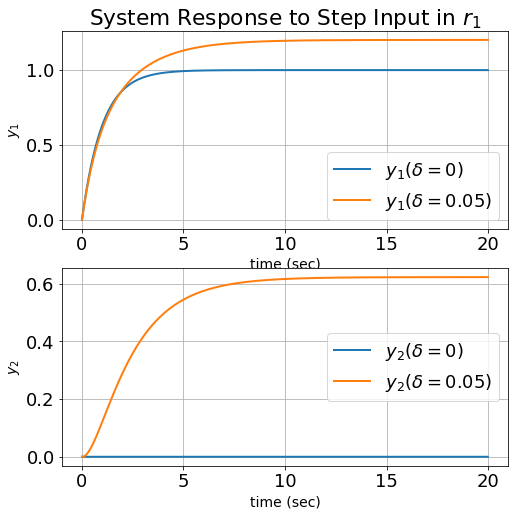

In [ ]:
plt.figure(figsize=(8,8));
ax = plt.subplot(2,1,1);
plt.title(r'System Response to Step Input in $r_1$')
ax.plot(t0_[:],y0_[0,:],linewidth=2,label=r'$y_1(\delta = 0)$')
ax.plot(t1_[:],y1_[0,:],linewidth=2,label=r'$y_1(\delta = 0.05)$')
plt.ylabel(r'$y_1$',fontsize=14)
plt.xlabel(r'time (sec)',fontsize=14)
plt.legend()
plt.grid()

ax = plt.subplot(2,1,2);
ax.plot(t0_[:],y0_[1,:],linewidth=2,label=r'$y_2(\delta = 0)$')
ax.plot(t1_[:],y1_[1,:],linewidth=2,label=r'$y_2(\delta = 0.05)$')
plt.ylabel(r'$y_2$',fontsize=14)
plt.xlabel(r'time (sec)',fontsize=14)
plt.legend()
plt.grid()

A perturbation of $5\%$ increase in $w_1$ and $5\%$ decrease in $w_2$ when a step input is applied to $r_1$ results in the system settling at a higher steady-state value of 1.2 for the perturbed system instead of the required steady-state value of 1 as observed in the unperturbed response. It can also be observed that an input to $r_1$ affects the output $y_2$ despite the transfer function in (a) showing a decoupling. 

(e) *Plot the system's response to a step input in reference $r_1$ in the presence of a simultaneous $11\%$ increase in control $w_1$ and $11\%$ decrease in control $w_2$ and describe how performance has changed.*




**Solution**

In [ ]:
delta_0, delta_2  = 0, 0.11
A_tilde = A - (B.multiply(K1.multiply(C)))
A_tilde_val0 = np.array(A_tilde.subs({a:a_val, d: delta_0})).astype(np.float64)
A_tilde_val1 = np.array(A_tilde.subs({a:a_val, d: delta_2})).astype(np.float64)

B_tilde = B.multiply(K2)
B_tilde_val0 = np.array(B_tilde.subs({a:a_val, d: delta_0})).astype(np.float64)
B_tilde_val1 = np.array(B_tilde.subs({a:a_val, d: delta_2})).astype(np.float64)

sys0 = ctrl.ss(A_tilde_val0, B_tilde_val0, C_val, D_val)
sys1 = ctrl.ss(A_tilde_val1, B_tilde_val1, C_val, D_val)

dt = 1e-2
tspan = np.arange(0, 20, dt)
t0_, y0_ = ctrl.step_response(sys0, T=tspan, input=0)
t1_, y1_ = ctrl.step_response(sys1, T=tspan, input=0)

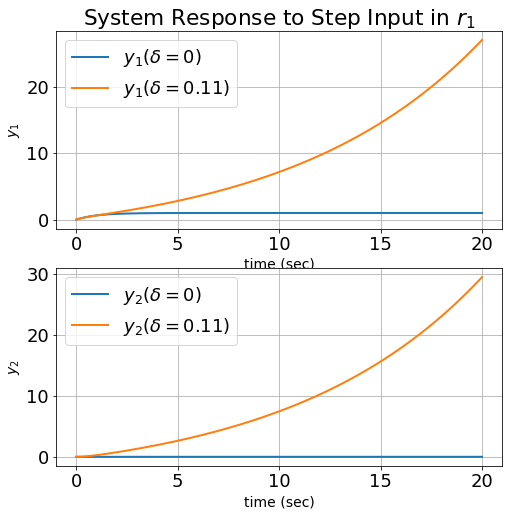

In [ ]:
plt.figure(figsize=(8,8));
ax = plt.subplot(2,1,1);
plt.title(r'System Response to Step Input in $r_1$')
ax.plot(t0_[:],y0_[0,:],linewidth=2,label=r'$y_1(\delta = 0)$')
ax.plot(t1_[:],y1_[0,:],linewidth=2,label=r'$y_1(\delta = 0.11)$')
plt.ylabel(r'$y_1$',fontsize=14)
plt.xlabel(r'time (sec)',fontsize=14)
plt.legend()
plt.grid()

ax = plt.subplot(2,1,2);
ax.plot(t0_[:],y0_[1,:],linewidth=2,label=r'$y_2(\delta = 0)$')
ax.plot(t1_[:],y1_[1,:],linewidth=2,label=r'$y_2(\delta = 0.11)$')
plt.ylabel(r'$y_2$',fontsize=14)
plt.xlabel(r'time (sec)',fontsize=14)
plt.legend()
plt.grid()

A perturbation of $11\%$ increase in $w_1$ and $11\%$ decrease in $w_2$ when a step input is applied to $r_1$ results in the perturbed system going unstable instead of settling to the required steady-state value of 1 as observed in the unperturbed response. As noted in (d), the input to $r_1$ affects the output $y_2$.

From the analysis in (d) and (e), applying SISO tools on a loop-at-a-time basis is not sufficient to analyze MIMIO systems as there are cross-coupling terms that need to be taken into account (recall cross coupling terms in (b)).

***Hint:*** To implement these simulations, you may find it convenient to use the following state-space realization of process $G$:

$$
A = \left[ \begin{matrix} 0 & a \\ -a & 0 \end{matrix} \right],\
B = I,\ 
C = \left[ \begin{matrix} 1 & a \\ -a & 1 \end{matrix} \right],\
D = 0.  
$$

In terms of this state-space realization, the perturbations in (d) and (e) correspond to replacing the $B$ matrix with $B = \left[ \begin{matrix} 1+\delta & 0 \\ 0 & 1-\delta \end{matrix} \right]$ where $\delta = 0.05$ in (d) and $\delta = 0.11$ in (e).

***Takeaway:*** *single input/output stability margins may be inadequate to predict robustness of MIMO systems -- in particular, a relatively small perturbation coordinated across multiple channels can drive a system unstable.*

***Acknowledgement:*** this excellent example is due to the late, great, [Andy Packard](https://me.berkeley.edu/news/andy-packard-professor-pioneer-in-robust-control-systems-and-beloved-teacher-1960-2019/).